In [1]:
import matplotlib.pyplot as plt
import numpy
import os
from PIL import Image
import torch
import torchvision.transforms as transforms

from models.train import generate_positive_pairs, generate_negative_pairs
from data.dataset import GalaxyCBRDataSet

In [2]:
to_pil = transforms.ToPILImage()

data_dir = './data/galaxy_dataset/'
data_transforms = transforms.ToTensor()
galaxy_dataset = GalaxyCBRDataSet(data_dir, data_transforms, force_download=False, h5_file="")

In [3]:
def plot_side_by_side(image_pair, pair_type=''):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(to_pil(image_pair[0]))
    axes[0].set_title('Original Image')
    axes[1].imshow(to_pil(image_pair[1]))
    axes[1].set_title(pair_type + ' Transformation')

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    
    plt.show()

In [4]:
query_img, idx = galaxy_dataset[810]

In [5]:
query_tensor = query_img.unsqueeze(0)
positive_pair = generate_positive_pairs(query_tensor, [0], 3)[0]
negative_pair = generate_negative_pairs(query_tensor, [idx], [0], 3, galaxy_dataset)[0]

### Positive Transforms

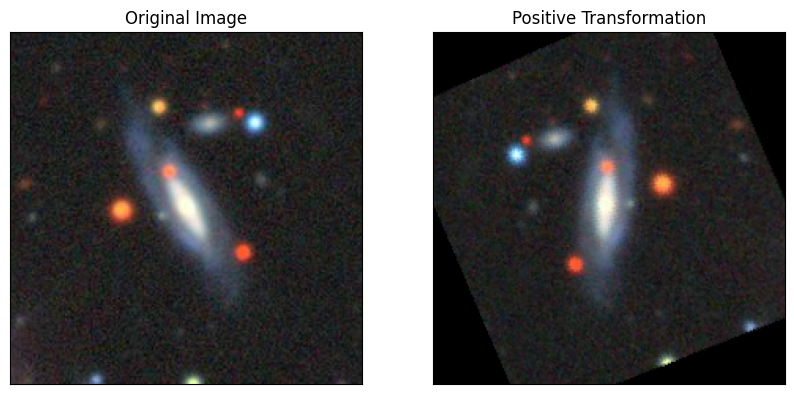

In [6]:
plot_side_by_side(positive_pair, pair_type='Positive')

### Negative Transformation

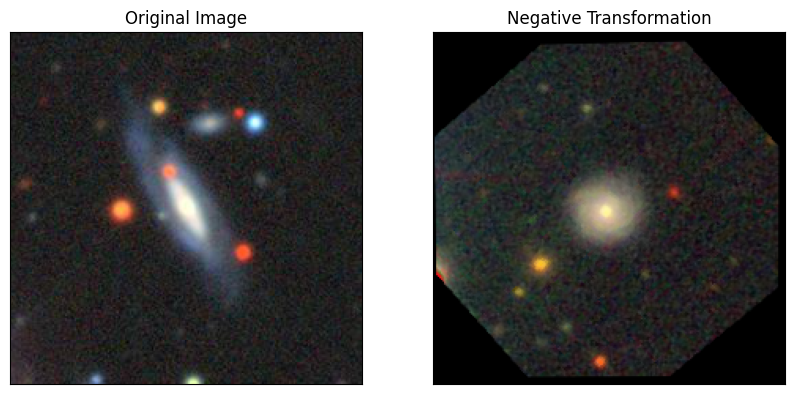

In [7]:
plot_side_by_side(negative_pair, pair_type='Negative')

### Model Performance Visualization